In [180]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Index

from pathlib import Path
from datetime import date
import requests

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns

from pandas import Series, DataFrame, Index, Categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

# A Dataset about Music Information, collected by Spotify.

## Source
Reference where the data comes from so the analysis can be reproduced by someone else. Provide the URL where to data can be retrieved from or the URL to download a data file.

Source: https://www.kaggle.com/datasets/kauvinlucas/30000-albums-aggregated-review-ratings

The following code retrieves CSV data from links stored in a Web page at Kaggle

## Goal of this Project:

* Applying what we have lerned in the lecture to a real-life model.
* Answer the following question: 
> * 1.How are music album rated by AOTY scoring?
> * 2.How different are the measure between user and critic in AOTY?
> * 3.Without supervising the data, which group of clusters is the optimal one by using K-mean clustering.
> * 4.In the optimal Clusters Group, which Genre is the most frequent overall?




__In order to achiving these goals:__
Seperate the project and dataset into two sections. Each section involves a method to analyze the project, which inlcudes K-mean Clustering, Linear/Multiple Regression.

__First Section:__
> * `Data Visualization`: Using all possible data cleaning techiques and graph to understand the data before moving on to the model analysis.

__Second Section:__
> * `Linear regression`: To find out the correlation among the variables and analyze the model to find the best fit model to answer research questions

__Third Section:__
> * `K-mean Clustering`: To find out which group of clusters is the optimal one. Then, analyze which type of Genre is the most frequent one in the optimal Cluster group.

## A brief info about our Dataset
> __album__: The main dataset we will use  <br>

> __albumRenamed__:This dataFrame contains the AOTY(Album of the year) Review/Scores and excluded from Metatcritcs columns. Applying __Supervised Data Learning Technique (Linear Regression Model)__.  <br>

> __albumRenamed2__: This dataFrame contains the Metacritics Review/Scores and excluded AOTY(Album of the year) columns. Applying __Unsupervised Data Learning Technique (K-mean Clustering)__.  <br>

In [110]:
album = pd.read_csv('album_ratings.csv')
album

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32353,Death Valley Girls,Under the Spell of Joy,October,2,2020,LP,Suicide Squeeze,NaN,70.0,7.0,NaN,NaN,67,7,63,3
32354,Gorillaz,"Song Machine, Season One: Strange Timez",October,23,2020,LP,NaN,NaN,80.0,11.0,9.3,44.0,75,8,94,4
32355,Tobin Sprout,Empty Horses,September,18,2020,LP,Fire,NaN,77.0,5.0,NaN,NaN,79,5,64,4
32356,Jeremy Ivey,Waiting out the Storm,October,16,2020,LP,ANTI-,NaN,82.0,4.0,NaN,NaN,77,3,64,3


***

## Data Modeling, Cleaning & Visualization
> * Brief introduction of what we will do next:

In [111]:
album.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32358 entries, 0 to 32357
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Artist                   32358 non-null  object 
 1   Title                    32357 non-null  object 
 2   Release Month            31769 non-null  object 
 3   Release Day              31768 non-null  object 
 4   Release Year             32358 non-null  int64  
 5   Format                   32358 non-null  object 
 6   Label                    28902 non-null  object 
 7   Genre                    24398 non-null  object 
 8   Metacritic Critic Score  13884 non-null  float64
 9   Metacritic Reviews       13884 non-null  float64
 10  Metacritic User Score    9099 non-null   float64
 11  Metacritic User Reviews  10574 non-null  float64
 12  AOTY Critic Score        32358 non-null  int64  
 13  AOTY Critic Reviews      32358 non-null  int64  
 14  AOTY User Score       

In [112]:
album.Genre.value_counts().head(20)

Hip Hop              1714
Indie Rock           1631
Indie Pop            1022
Alternative Rock     1014
Singer-Songwriter     953
Pop Rock              809
Electronic            523
Art Pop               463
Folk                  463
Synthpop              415
Post-Punk             387
Pop                   372
R&B                   367
Hard Rock             363
Psychedelic Rock      328
Electropop            325
Ambient               315
Indie Folk            292
Country               287
Dream Pop             256
Name: Genre, dtype: int64

In [113]:
album.Format.value_counts()

LP    30470
EP     1888
Name: Format, dtype: int64

In [114]:
album.Label.value_counts()

Columbia                      509
Atlantic                      355
RCA                           298
Warner Bros.                  294
Domino                        265
                             ... 
Musical Freedom                 1
Lost Balloon                    1
Proper, Scarlet Letter          1
Reasonable People's League      1
Verve Records / UMG             1
Name: Label, Length: 8245, dtype: int64

In [115]:
albumRename = album.rename(columns={'Release Month': 'month','Release Day': 'day','Release Year': 'year','Metacritic Critic Score': 'MetacriticCriticScore','Metacritic Reviews': 'MetacriticReviews','Metacritic User Score': 'MetacriticUserScore','Metacritic User Reviews': 'MetacriticUserReviews','AOTY Critic Score': 'AOTYCriticScore','AOTY Critic Reviews': 'AOTYCriticReviews','AOTY User Score': 'AOTYUserScore','AOTY User Reviews': 'AOTYUserReviews'}).copy()

In [116]:
albumRename

,Artist,Title,month,day,year,Format,Label,Genre,MetacriticCriticScore,MetacriticReviews,MetacriticUserScore,MetacriticUserReviews,AOTYCriticScore,AOTYCriticReviews,AOTYUserScore,AOTYUserReviews
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32353,Death Valley Girls,Under the Spell of Joy,October,2,2020,LP,Suicide Squeeze,NaN,70.0,7.0,NaN,NaN,67,7,63,3
32354,Gorillaz,"Song Machine, Season One: Strange Timez",October,23,2020,LP,NaN,NaN,80.0,11.0,9.3,44.0,75,8,94,4
32355,Tobin Sprout,Empty Horses,September,18,2020,LP,Fire,NaN,77.0,5.0,NaN,NaN,79,5,64,4
32356,Jeremy Ivey,Waiting out the Storm,October,16,2020,LP,ANTI-,NaN,82.0,4.0,NaN,NaN,77,3,64,3


In [117]:
albumRename.year.value_counts()

2019    2453
2018    2235
2017    2062
2020    2023
2016    1936
        ... 
1951       4
1950       3
1940       1
1947       1
1946       1
Name: year, Length: 74, dtype: int64

In [118]:
albumRename.month.value_counts()

October      3553
September    3535
March        3089
May          3008
April        2976
June         2972
February     2593
August       2496
November     2332
January      2283
July         2167
December      765
Name: month, dtype: int64

In [119]:
album.columns

Index(['Artist', 'Title', 'Release Month', 'Release Day', 'Release Year',
       'Format', 'Label', 'Genre', 'Metacritic Critic Score',
       'Metacritic Reviews', 'Metacritic User Score',
       'Metacritic User Reviews', 'AOTY Critic Score', 'AOTY Critic Reviews',
       'AOTY User Score', 'AOTY User Reviews'],
      dtype='object')

In [120]:
albumRename.isna().sum()

Artist                       0
Title                        1
month                      589
day                        590
year                         0
Format                       0
Label                     3456
Genre                     7960
MetacriticCriticScore    18474
MetacriticReviews        18474
MetacriticUserScore      23259
MetacriticUserReviews    21784
AOTYCriticScore              0
AOTYCriticReviews            0
AOTYUserScore                0
AOTYUserReviews              0
dtype: int64

In [125]:
albumRenameCopy = albumRename
albumRenameCopy['Genre']=albumRenameCopy.Genre.fillna('no Genre')
albumRenameCopy['month']=albumRenameCopy.month.fillna('n/a')
albumRenameCopy['day']=albumRenameCopy.day.fillna('n/a')
albumRenameCopy['Label']=albumRenameCopy.Label.fillna('no label')
albumRenameCopy['Title']=albumRenameCopy.Title.fillna('no title')
albumRenameCopy.isna().sum()

Artist                       0
Title                        0
month                        0
day                          0
year                         0
Format                       0
Label                        0
Genre                        0
MetacriticCriticScore    18474
MetacriticReviews        18474
MetacriticUserScore      23259
MetacriticUserReviews    21784
AOTYCriticScore              0
AOTYCriticReviews            0
AOTYUserScore                0
AOTYUserReviews              0
dtype: int64

In [99]:
Genre_list = albumRename.Genre.value_counts()[albumRename.Genre.value_counts() < 523 ]

In [101]:
albumRename.Genre=albumRename.Genre.apply(lambda x:'otherGenre' if x in Genre_list else x)

In [102]:
albumRename.Genre.value_counts()

otherGenre           16732
Hip Hop               1714
Indie Rock            1631
Indie Pop             1022
Alternative Rock      1014
Singer-Songwriter      953
Pop Rock               809
Electronic             523
Name: Genre, dtype: int64

In [103]:
albumRename.describe()

,year,MetacriticCriticScore,MetacriticReviews,MetacriticUserScore,MetacriticUserReviews,AOTYCriticScore,AOTYCriticReviews,AOTYUserScore,AOTYUserReviews
count,32358.000000,13884.000000,13884.000000,9099.000000,10574.000000,32358.000000,32358.000000,32358.000000,32358.000000
mean,2006.667810,73.285148,12.483434,7.782020,63.163893,72.808332,5.645003,71.283794,61.988782
std,14.132255,8.399107,7.911986,0.978036,325.204608,11.214989,6.179734,9.653036,184.221848
min,1940.000000,15.000000,4.000000,1.400000,3.000000,4.000000,1.000000,0.000000,1.000000
25%,2002.000000,69.000000,6.000000,7.400000,8.000000,67.000000,2.000000,67.000000,7.000000
50%,2012.000000,74.000000,10.000000,8.000000,14.000000,74.000000,3.000000,73.000000,14.000000
75%,2017.000000,79.000000,17.000000,8.500000,37.000000,80.000000,7.000000,78.000000,39.000000
max,2020.000000,98.000000,51.000000,9.500000,14720.000000,100.000000,48.000000,100.000000,4530.000000


In [104]:
albumRename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32358 entries, 0 to 32357
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist                 32358 non-null  object 
 1   Title                  32357 non-null  object 
 2   month                  31769 non-null  object 
 3   day                    31768 non-null  object 
 4   year                   32358 non-null  int64  
 5   Format                 32358 non-null  object 
 6   Label                  28902 non-null  object 
 7   Genre                  24398 non-null  object 
 8   MetacriticCriticScore  13884 non-null  float64
 9   MetacriticReviews      13884 non-null  float64
 10  MetacriticUserScore    9099 non-null   float64
 11  MetacriticUserReviews  10574 non-null  float64
 12  AOTYCriticScore        32358 non-null  int64  
 13  AOTYCriticReviews      32358 non-null  int64  
 14  AOTYUserScore          32358 non-null  int64  
 15  AO

In [105]:
albumRename.isna().sum()

Artist                       0
Title                        1
month                      589
day                        590
year                         0
Format                       0
Label                     3456
Genre                     7960
MetacriticCriticScore    18474
MetacriticReviews        18474
MetacriticUserScore      23259
MetacriticUserReviews    21784
AOTYCriticScore              0
AOTYCriticReviews            0
AOTYUserScore                0
AOTYUserReviews              0
dtype: int64

In [106]:
albumRename['Genre']=albumRename.Genre.fillna('no Genre')
albumRename['month']=albumRename.month.fillna('n/a')
albumRename['day']=albumRename.day.fillna('n/a')
albumRename['Label']=albumRename.Label.fillna('no label')
albumRename['Title']=albumRename.Title.fillna('no title')
albumRename.isna().sum()

Artist                       0
Title                        0
month                        0
day                          0
year                         0
Format                       0
Label                        0
Genre                        0
MetacriticCriticScore    18474
MetacriticReviews        18474
MetacriticUserScore      23259
MetacriticUserReviews    21784
AOTYCriticScore              0
AOTYCriticReviews            0
AOTYUserScore                0
AOTYUserReviews              0
dtype: int64

In [108]:
albumRenameClean = albumRename.drop(columns = ['MetacriticCriticScore'
                                              ,'MetacriticReviews'
                                              ,'MetacriticUserScore'
                                              ,'MetacriticUserReviews'])

In [24]:
albumRenameClean

,Artist,Title,month,day,year,Format,Label,Genre,AOTYCriticScore,AOTYCriticReviews,AOTYUserScore,AOTYUserReviews
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,otherGenre,79,25,78,55
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,otherGenre,73,11,73,8
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,otherGenre,92,30,87,1335
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,otherGenre,70,23,66,38
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,74,24,78,44
...,...,...,...,...,...,...,...,...,...,...,...,...
32353,Death Valley Girls,Under the Spell of Joy,October,2,2020,LP,Suicide Squeeze,no Genre,67,7,63,3
32354,Gorillaz,"Song Machine, Season One: Strange Timez",October,23,2020,LP,no label,no Genre,75,8,94,4
32355,Tobin Sprout,Empty Horses,September,18,2020,LP,Fire,no Genre,79,5,64,4
32356,Jeremy Ivey,Waiting out the Storm,October,16,2020,LP,ANTI-,no Genre,77,3,64,3


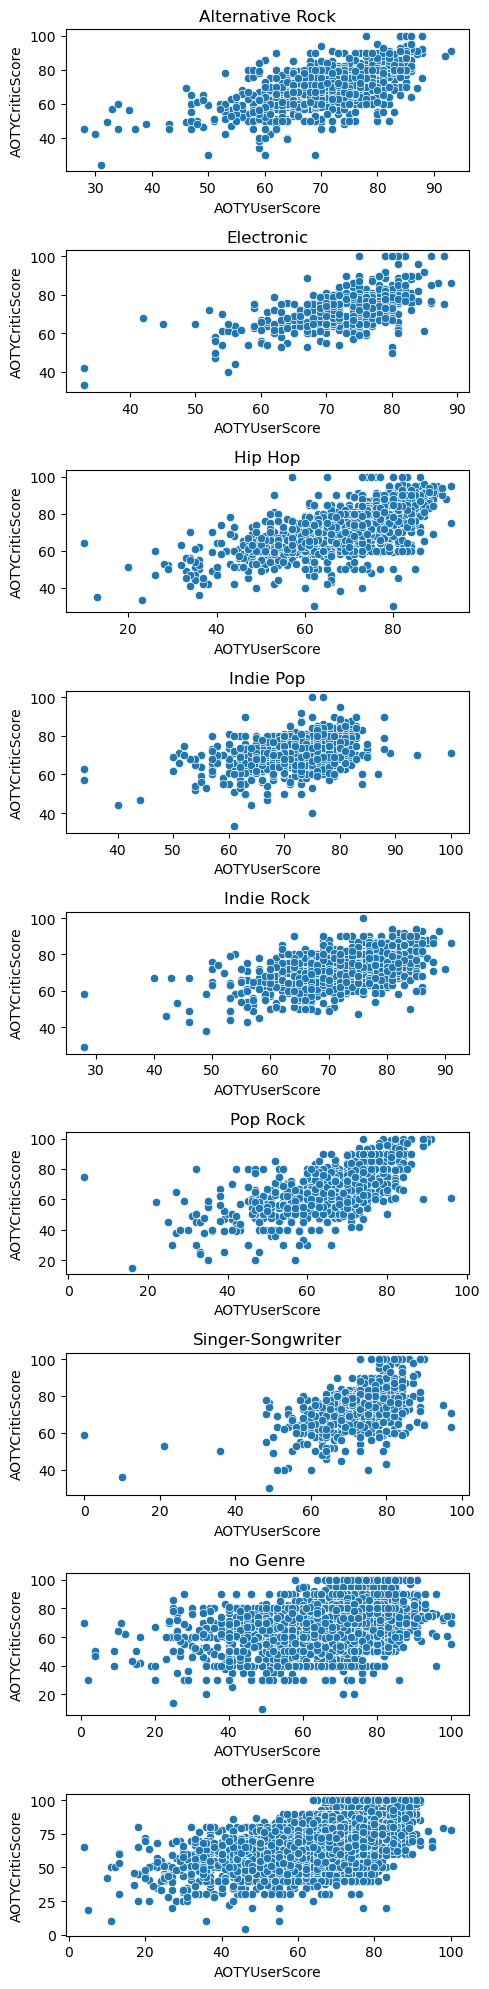

In [24]:
fig, axes = plt.subplots(nrows=len(albumRenameClean['Genre'].unique()), figsize=(5,20))
for i, (key, subdf) in enumerate(albumRenameClean.groupby('Genre')):
    sns.scatterplot(x=subdf.AOTYUserScore, y=subdf.AOTYCriticScore, ax=axes[i])
    axes[i].set_title(key)  
plt.tight_layout()
plt.show()

In [25]:
FormatDummy = pd.get_dummies(albumRenameClean['Format'])

In [26]:
FormatDummy.head()

,EP,LP
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
albumRenameClean1 = pd.concat((albumRenameClean,FormatDummy),axis=1)

In [29]:
albumRenameClean1.drop(['Format'],axis = 1)

,Artist,Title,month,day,year,Label,Genre,AOTYCriticScore,AOTYCriticReviews,AOTYUserScore,AOTYUserReviews,EP,LP
0,Neko Case,Middle Cyclone,March,3,2009,ANTI-,otherGenre,79,25,78,55,0,1
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,Thirty Tigers,otherGenre,73,11,73,8,0,1
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,Domino,otherGenre,92,30,87,1335,0,1
3,Bruce Springsteen,Working on a Dream,January,27,2009,Columbia Records,otherGenre,70,23,66,38,0,1
4,Andrew Bird,Noble Beast,January,20,2009,Fat Possum,Singer-Songwriter,74,24,78,44,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32353,Death Valley Girls,Under the Spell of Joy,October,2,2020,Suicide Squeeze,no Genre,67,7,63,3,0,1
32354,Gorillaz,"Song Machine, Season One: Strange Timez",October,23,2020,no label,no Genre,75,8,94,4,0,1
32355,Tobin Sprout,Empty Horses,September,18,2020,Fire,no Genre,79,5,64,4,0,1
32356,Jeremy Ivey,Waiting out the Storm,October,16,2020,ANTI-,no Genre,77,3,64,3,0,1


In [31]:
albumRenameClean2 = albumRenameClean1.rename(columns={'LP': 'is_LP'}).copy()

In [35]:
albumRenameClean3 = albumRenameClean2.drop(['EP','Format'],axis = 1)

In [36]:
albumRenameClean3

,Artist,Title,month,day,year,Label,Genre,AOTYCriticScore,AOTYCriticReviews,AOTYUserScore,AOTYUserReviews,is_LP
0,Neko Case,Middle Cyclone,March,3,2009,ANTI-,otherGenre,79,25,78,55,1
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,Thirty Tigers,otherGenre,73,11,73,8,1
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,Domino,otherGenre,92,30,87,1335,1
3,Bruce Springsteen,Working on a Dream,January,27,2009,Columbia Records,otherGenre,70,23,66,38,1
4,Andrew Bird,Noble Beast,January,20,2009,Fat Possum,Singer-Songwriter,74,24,78,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32353,Death Valley Girls,Under the Spell of Joy,October,2,2020,Suicide Squeeze,no Genre,67,7,63,3,1
32354,Gorillaz,"Song Machine, Season One: Strange Timez",October,23,2020,no label,no Genre,75,8,94,4,1
32355,Tobin Sprout,Empty Horses,September,18,2020,Fire,no Genre,79,5,64,4,1
32356,Jeremy Ivey,Waiting out the Storm,October,16,2020,ANTI-,no Genre,77,3,64,3,1


In [37]:
Genredummies = pd.get_dummies(albumRenameClean3.Genre)

In [38]:
albumRenameGenreClean = pd.concat([albumRenameClean3,Genredummies], axis = 'columns').drop(['Genre'], axis = 'columns')

In [44]:
albumRenameGenreClean

,Artist,Title,month,day,year,Label,AOTYCriticScore,AOTYCriticReviews,AOTYUserScore,AOTYUserReviews,is_LP,Alternative Rock,Electronic,Hip Hop,Indie Pop,Indie Rock,Pop Rock,Singer-Songwriter,no Genre,otherGenre
0,Neko Case,Middle Cyclone,March,3,2009,ANTI-,79,25,78,55,1,0,0,0,0,0,0,0,0,1
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,Thirty Tigers,73,11,73,8,1,0,0,0,0,0,0,0,0,1
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,Domino,92,30,87,1335,1,0,0,0,0,0,0,0,0,1
3,Bruce Springsteen,Working on a Dream,January,27,2009,Columbia Records,70,23,66,38,1,0,0,0,0,0,0,0,0,1
4,Andrew Bird,Noble Beast,January,20,2009,Fat Possum,74,24,78,44,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32353,Death Valley Girls,Under the Spell of Joy,October,2,2020,Suicide Squeeze,67,7,63,3,1,0,0,0,0,0,0,0,1,0
32354,Gorillaz,"Song Machine, Season One: Strange Timez",October,23,2020,no label,75,8,94,4,1,0,0,0,0,0,0,0,1,0
32355,Tobin Sprout,Empty Horses,September,18,2020,Fire,79,5,64,4,1,0,0,0,0,0,0,0,1,0
32356,Jeremy Ivey,Waiting out the Storm,October,16,2020,ANTI-,77,3,64,3,1,0,0,0,0,0,0,0,1,0


In [43]:
albumRenameGenreClean.columns

Index(['Artist', 'Title', 'month', 'day', 'year', 'Label', 'AOTYCriticScore',
       'AOTYCriticReviews', 'AOTYUserScore', 'AOTYUserReviews', 'is_LP',
       'Alternative Rock', 'Electronic', 'Hip Hop', 'Indie Pop', 'Indie Rock',
       'Pop Rock', 'Singer-Songwriter', 'no Genre', 'otherGenre'],
      dtype='object')

In [46]:
albumRenameFinal = albumRenameGenreClean.drop(['Artist', 'Title', 'month', 'day', 'year', 'Label'],axis = 1)

<AxesSubplot: >

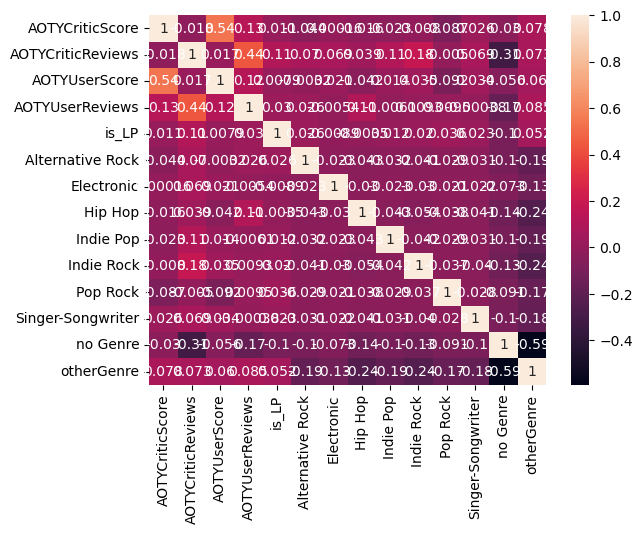

In [51]:
correlation = albumRenameFinal.corr()
sns.heatmap(correlation, annot=True)

***

## First Part: Linear Regression 
> * In this part, we will use linear regreesion to analysis the overall fitness of our dataset by only using the selected columns.

In [47]:
# Splitting the data into features X and target variable Y
X = albumRenameFinal.drop('AOTYCriticScore', axis = 'columns')
y = albumRenameFinal.AOTYCriticScore

In [48]:
# Scale the features X so that no single feature dominates the learning algorithm
from sklearn.preprocessing import StandardScaler
X_scaled =StandardScaler().fit_transform(X)

In [49]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2)

In [50]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
lr.score(X_test,y_test)

0.3018200165732209

In [53]:
albumRenameFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32358 entries, 0 to 32357
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AOTYCriticScore    32358 non-null  int64
 1   AOTYCriticReviews  32358 non-null  int64
 2   AOTYUserScore      32358 non-null  int64
 3   AOTYUserReviews    32358 non-null  int64
 4   is_LP              32358 non-null  uint8
 5   Alternative Rock   32358 non-null  uint8
 6   Electronic         32358 non-null  uint8
 7   Hip Hop            32358 non-null  uint8
 8   Indie Pop          32358 non-null  uint8
 9   Indie Rock         32358 non-null  uint8
 10  Pop Rock           32358 non-null  uint8
 11  Singer-Songwriter  32358 non-null  uint8
 12  no Genre           32358 non-null  uint8
 13  otherGenre         32358 non-null  uint8
dtypes: int64(4), uint8(10)
memory usage: 1.3 MB


In [55]:
y = albumRenameFinal['AOTYCriticScore']
x = albumRenameFinal['AOTYUserScore']

In [56]:
corrcoef = np.corrcoef(x,y)
corrcoef

array([[1.        , 0.53643607],
       [0.53643607, 1.        ]])

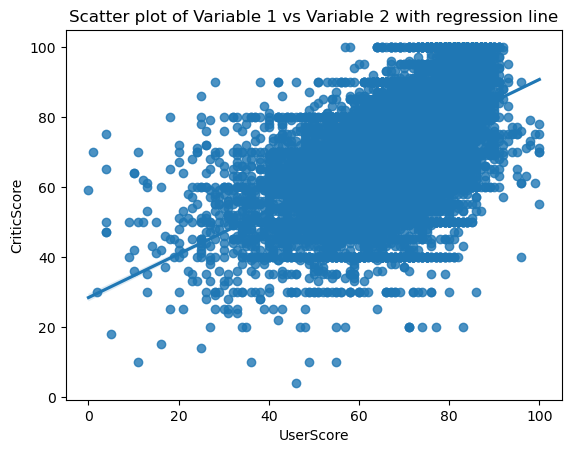

In [57]:
sns.regplot(x=x, y=y)
plt.xlabel('UserScore')
plt.ylabel('CriticScore')
plt.title('Scatter plot of Variable 1 vs Variable 2 with regression line')
plt.show()

In [58]:
featureColumns=['AOTYUserScore']
responseColumn='AOTYCriticScore'

In [59]:
selectedData=albumRenameFinal[[*featureColumns,responseColumn]]

In [60]:
training,testing=train_test_split(selectedData,test_size=0.1,train_size=0.9,shuffle=True)

In [65]:
trainingFeatures=training.loc[:,featureColumns].to_numpy().reshape((-1,len(featureColumns)))
# Reshape to be a column vector. A value of -1 means infer the size by the total number of cells and the other dimensions.
trainingResponse=training.loc[:,responseColumn].to_numpy().reshape((-1,1))
testingFeatures=testing.loc[:,featureColumns].to_numpy().reshape((-1,len(featureColumns)))
testingResponse=testing.loc[:,responseColumn].to_numpy().reshape((-1,1))

In [66]:
lin_reg = LinearRegression()
lin_reg.fit(trainingFeatures,trainingResponse)

LinearRegression()

In [67]:
predictedResponse=lin_reg.predict(testingFeatures)

In [71]:
r2_score(testingResponse,predictedResponse)

0.2639158521808961

In [72]:
mean_squared_error(testingResponse, predictedResponse)

86.65528863352203

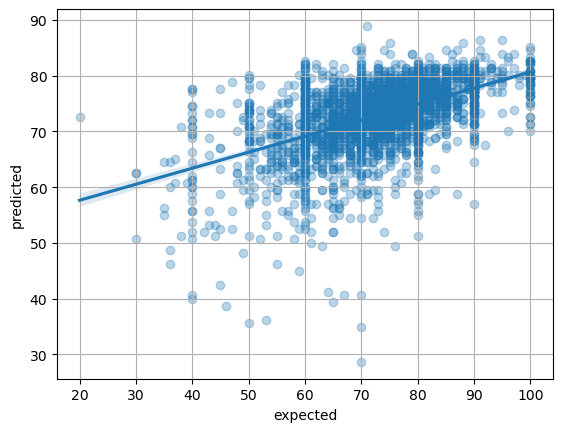

In [73]:
testingResults=DataFrame(
    {
        'expected':testingResponse.reshape((-1)),
        'predicted':predictedResponse.reshape((-1))
    }
)
sns.regplot(data=testingResults.sort_values('expected'),x='expected',y='predicted',scatter_kws={'alpha': 0.3})
plt.grid()

### In Summary:
> According to the above regression analysis we have completed through linear regression as well as the calcuting the model fit,We find that the rating or the view of an album doesn't limited to one type of music genre. However, due to the fact that the popular genre like pop, rock and electric have the most number of production to be review, ther average rate is higher than the rest. From the regression, we can see there are many outliers that casue the MSE is higher than we expected, but we don't wannt to exclude them for the reason that all the scoring is subjective and such outliers is indicating the authenticity of the data in reflect to the reality. However, we can still see that both user and critic share similar characteristics in terms of critic scores and user scores and their review. Our finding is that, through the prediction model, no matter the years we are in, public review and general taste of music is in line with with what professional critic's review.

## Second Part: Unsupervised Data -> K-means Clustering
> * In this part, we will utilize a KNN clustering method to detect which group cluster is the highest overall.

In [160]:
albumRename2 = albumRenameCopy.drop(columns=['AOTYCriticScore','AOTYCriticReviews','AOTYUserScore','AOTYUserReviews'])
albumRename2.isna().sum()

Artist                       0
Title                        0
month                        0
day                          0
year                         0
Format                       0
Label                        0
Genre                        0
MetacriticCriticScore    18474
MetacriticReviews        18474
MetacriticUserScore      23259
MetacriticUserReviews    21784
dtype: int64

Basd on the information above, there is some missing value in both MetacriticCriticScore and MetacriticUserScore. Therefore, we decide to use `fillna()` method to fill all the __NaH__ values to __0__.

In [161]:
albumRename2 = albumRename2.fillna(0)
albumRename2.isna().sum()

Artist                   0
Title                    0
month                    0
day                      0
year                     0
Format                   0
Label                    0
Genre                    0
MetacriticCriticScore    0
MetacriticReviews        0
MetacriticUserScore      0
MetacriticUserReviews    0
dtype: int64

In [162]:
albumRename2

,Artist,Title,month,day,year,Format,Label,Genre,MetacriticCriticScore,MetacriticReviews,MetacriticUserScore,MetacriticUserReviews
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32353,Death Valley Girls,Under the Spell of Joy,October,2,2020,LP,Suicide Squeeze,no Genre,70.0,7.0,0.0,0.0
32354,Gorillaz,"Song Machine, Season One: Strange Timez",October,23,2020,LP,no label,no Genre,80.0,11.0,9.3,44.0
32355,Tobin Sprout,Empty Horses,September,18,2020,LP,Fire,no Genre,77.0,5.0,0.0,0.0
32356,Jeremy Ivey,Waiting out the Storm,October,16,2020,LP,ANTI-,no Genre,82.0,4.0,0.0,0.0


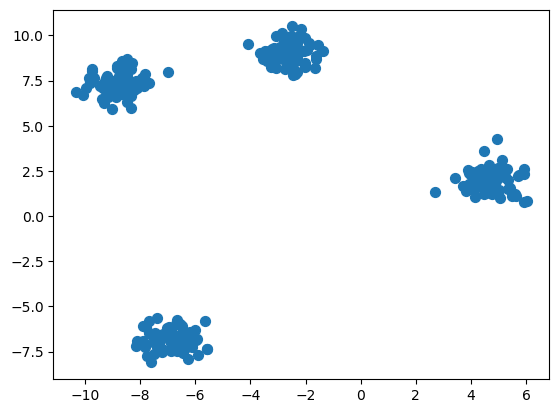

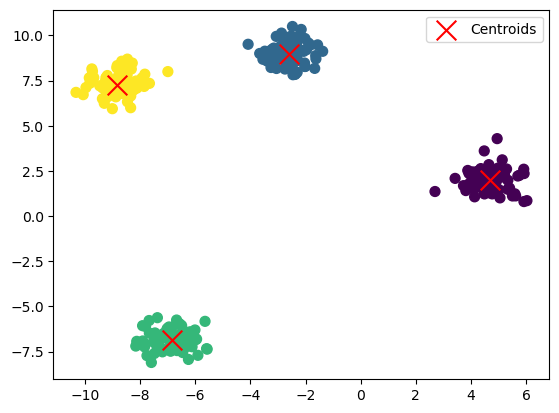

In [149]:
# Generate a sample dataset
albumRename2, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Visualize the dataset
plt.scatter(albumRename2[:, 0], albumRename2[:, 1], s=50)
plt.show()
# Apply K-means clustering
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(albumRename2)

# Visualize the resulting clusters
plt.scatter(albumRename2[:, 0], albumRename2[:, 1], c=pred_y, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.legend()
plt.show()

In [151]:
stats={}
for num_clusters in range(2,11):
    kmeans_model=KMeans(n_clusters=num_clusters,  n_init="auto" )
    kmeans_model.fit( albumRename2 )
    stats[num_clusters]=(
        kmeans_model.inertia_,
        silhouette_score(albumRename2, kmeans_model.labels_)
    ) 

In [152]:
statsDF=DataFrame(stats,index=['inertia','silhouette']).T
statsDF

,inertia,silhouette
2,13041.097127,0.473154
3,1773.736866,0.799280
4,203.890747,0.875647
5,190.533931,0.728836
6,169.920236,0.609892
7,157.506714,0.611365
8,137.147241,0.466094
9,129.510360,0.469514
10,109.902009,0.330987


In [153]:
statsDF['silhouette'].sort_values(ascending=False)

4     0.875647
3     0.799280
5     0.728836
7     0.611365
6     0.609892
2     0.473154
9     0.469514
8     0.466094
10    0.330987
Name: silhouette, dtype: float64

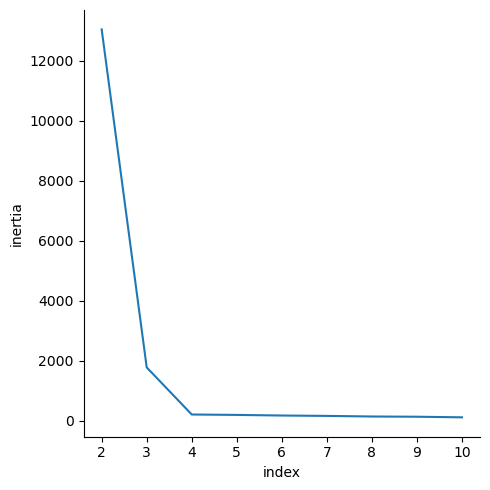

In [154]:
sns.relplot(statsDF['inertia'].reset_index(),x='index',y='inertia',kind='line')

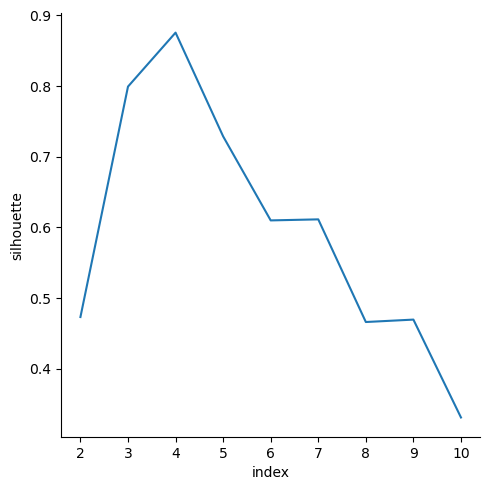

In [155]:
sns.relplot(statsDF['silhouette'].reset_index(),x='index',y='silhouette',kind='line')

> Base on what we got in the graph, we can see the inertia score drop and the trend starts show a flat pattern in __4 Clusters__. Meanwhile, __4 Cluster groups__ also has the highest sihouette score overall. Thus, we can conclude __4 Clusters__ is the best overall.

In [164]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = albumRename2[['Genre', 'MetacriticCriticScore', 'MetacriticUserScore']]
column_transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['MetacriticCriticScore', 'MetacriticUserScore']),
    ('cat', OneHotEncoder(), ['Genre'])
])

preprocessed_data = column_transformer.fit_transform(data)


In [165]:
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(preprocessed_data)
    silhouette_avg = silhouette_score(preprocessed_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 to match the cluster_range


In [166]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(preprocessed_data)


In [167]:
albumRename2['Cluster'] = cluster_labels

In [168]:
centroids = kmeans.cluster_centers_

In [169]:
cluster_summary = albumRename2.groupby('Cluster')[['MetacriticCriticScore', 'MetacriticUserScore']].mean()
cluster_summary

,MetacriticCriticScore,MetacriticUserScore
Cluster,,
0,0.007029,0.000754
1,76.026442,7.901202
2,0.022294,0.002280
3,73.196990,0.034200
4,73.470717,7.835122
5,73.364789,0.042347
6,0.129787,0.009681
7,69.324759,7.663505
8,72.943429,7.703220


In [170]:
most_frequent_genres = albumRename2.groupby('Cluster')['Genre'].agg(lambda x: x.value_counts().index[0])
most_frequent_genres

Cluster
0     Alternative Rock
1    Singer-Songwriter
2             no Genre
3             no Genre
4     Alternative Rock
5           Indie Rock
6              Hip Hop
7             no Genre
8              Hip Hop
9           Indie Rock
Name: Genre, dtype: object

In [171]:
cluster_summary['MostFrequentGenre'] = most_frequent_genres
cluster_summary

,MetacriticCriticScore,MetacriticUserScore,MostFrequentGenre
Cluster,,,
0,0.007029,0.000754,Alternative Rock
1,76.026442,7.901202,Singer-Songwriter
2,0.022294,0.002280,no Genre
3,73.196990,0.034200,no Genre
4,73.470717,7.835122,Alternative Rock
5,73.364789,0.042347,Indie Rock
6,0.129787,0.009681,Hip Hop
7,69.324759,7.663505,no Genre
8,72.943429,7.703220,Hip Hop


In [178]:
def label_clusters(row):
    if row['Cluster'] == 0:
        return 'Alternative Rock'
    elif row['Cluster'] == 1:
        return 'Singer-Songwriter'
    elif row['Cluster'] == 2:
        return 'no Genre'
    elif row['Cluster'] == 3:
        return 'no Genre'
    elif row['Cluster'] == 4:
        return 'Alternative Rock'
    elif row['Cluster'] == 5:
        return 'Indie Rock'
    elif row['Cluster'] == 6:
        return 'Hip Hop'
    elif row['Cluster'] == 7:
        return 'no Genre'
    elif row['Cluster'] == 8:
        return 'Hip Hop'
    elif row['Cluster'] == 9:
        return 'Indie Rock'

albumRename2['MostFrequentGenre'] = albumRename2.apply(label_clusters, axis=1)

In [179]:
albumRename2[albumRename2['Cluster'] == 4]

,Artist,Title,month,day,year,Format,Label,Genre,MetacriticCriticScore,MetacriticReviews,MetacriticUserScore,MetacriticUserReviews,Cluster,MostFrequentGenre
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,4,Alternative Rock
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,4,Alternative Rock
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,4,Alternative Rock
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,4,Alternative Rock
5,Bon Iver,Blood Bank EP,January,20,2009,EP,Jagjaguwar,Indie Folk,72.0,15.0,8.4,71.0,4,Alternative Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32056,LeAnn Rimes,Twisted Angel,October,1,2002,LP,Curb,Pop,51.0,8.0,7.1,23.0,4,Alternative Rock
32080,Squeeze,The Knowledge,October,13,2017,LP,Love,Pop Rock,81.0,6.0,5.6,29.0,4,Alternative Rock
32141,Shadows Fall,Fire from the Sky,May,12,2012,LP,Razor & Tie,Metalcore,81.0,6.0,8.8,4.0,4,Alternative Rock
32203,Siriusmo,Enthusiast,June,25,2013,LP,Monkeytown,Electro House,73.0,5.0,8.4,7.0,4,Alternative Rock


 > * By putting the `Cluster groups` back to dataset and add an additional `MostFrequentGerne` column. We can analyze which type of Gener is most common is `4 Clusers group`. And that is __Alternative Rock__ with the mean __MetacriticCriticScore__ of 73.
 
### In Summary:
> * According to the step by step analysis we have completed through K-mean clustering, we sorted out `4 Clusters group` is the best compared to other cluster groups. And the most frequent type of Genre in `4 Cluster group` is named by __Alternative Rock__. Which further suggests that there is a significant number of albums in our dataset that belong to __Alternative Rock__ and share similar characteristics in terms of critic scores and user scores.

## Project Conclusion:

* Through the K-mean clustering analysis, we found that the 4 Clusters group is the best among other cluster groups, and the most frequent type of Genre in this group is named as Alternative Rock. This indicates that there is a significant number of albums in our dataset that belong to Alternative Rock and share similar characteristics in terms of critic scores and user scores.

* Moreover, our regression analysis revealed that the rating or the view of an album is not limited to one type of music genre. While popular genres like pop, rock, and electric have the most number of productions to be reviewed, we observed many outliers that caused the mean squared error (MSE) to be higher than expected. However, we concluded that these outliers reflect the authenticity of the data in reflecting the reality of subjective scoring. Additionally, we found that both user and critic share similar characteristics in terms of critic scores and user scores and their reviews. Our finding suggests that, through the prediction model, regardless of the year, public review and general taste of music are in line with professional critics' reviews.